In [1]:
#%matplotlib notebook
import json
import requests
#from config import api_key
import matplotlib.pyplot as plt
import datetime
from time import strptime
import numpy as np
import pandas as pd
import os
import csv
import re

In [2]:
cryptodatafile = 'merged_crypto_data.csv'
RawCrypto_df = pd.read_csv(cryptodatafile)

RawCrypto_df['Coin'].unique()


array(['bitcoin', 'bitcoin-cash', 'bitconnect', 'dash', 'ethereum',
       'ethereum-classic', 'iota', 'litecoin', 'monero', 'nem', 'neo',
       'qtum', 'stratis', 'waves'], dtype=object)

In [3]:
def monthToNum(shortMonth):
    return {
            'jan' : 1,
            'feb' : 2,
            'mar' : 3,
            'apr' : 4,
            'may' : 5,
            'jun' : 6,
            'jul' : 7,
            'aug' : 8,
            'sep' : 9, 
            'oct' : 10,
            'nov' : 11,
            'dec' : 12
    }[shortMonth]

splitdate = pd.DataFrame()
splitdate[['month','day','year']] = RawCrypto_df['Date'].str.split("\s|,", 2, expand=True)
splitdate['month'] = splitdate['month'].str.lower()
splitdate['month'] = splitdate['month'].apply(monthToNum)
# splitdate['M'] = monthToNum(splitdate['M'])
splitdate

,month,day,year
0,3,02,2021
1,3,01,2021
2,2,28,2021
3,2,27,2021
4,2,26,2021
...,...,...,...
26303,6,07,2016
26304,6,06,2016
26305,6,05,2016
26306,6,04,2016


In [4]:
RawCrypto_df.insert(1,'Datestamp',pd.to_datetime(splitdate[['year','month','day']]))
RawCrypto_df

,Coin,Datestamp,Date,Open,High,Low,Close,Volume,Market Cap
0,bitcoin,2021-03-02,"Mar 02, 2021",49612.11,50127.51,47228.85,48378.99,47530897720,"$901,933,683,269"
1,bitcoin,2021-03-01,"Mar 01, 2021",45159.50,49784.02,45115.09,49631.24,53891300112,"$925,235,527,882"
2,bitcoin,2021-02-28,"Feb 28, 2021",46194.02,46716.43,43241.62,45137.77,53443887451,"$841,428,977,515"
3,bitcoin,2021-02-27,"Feb 27, 2021",46344.77,48253.27,45269.03,46188.45,45910946382,"$860,978,135,421"
4,bitcoin,2021-02-26,"Feb 26, 2021",47180.46,48370.79,44454.84,46339.76,350967941479,"$863,752,275,053"
...,...,...,...,...,...,...,...,...,...
26303,waves,2016-06-07,"Jun 07, 2016",0.77,1.08,0.77,0.84,45932,$0
26304,waves,2016-06-06,"Jun 06, 2016",0.71,1.17,0.71,0.77,95573,$0
26305,waves,2016-06-05,"Jun 05, 2016",0.59,1.11,0.58,0.71,41700,$0
26306,waves,2016-06-04,"Jun 04, 2016",1.09,1.29,0.58,0.59,4912,$0


In [ ]:
ethereum_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'ethereum'].sort_values(by='Datestamp')
litecoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'litecoin'].sort_values(by='Datestamp')
bitcoin_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'bitcoin'].sort_values(by='Datestamp')
iota_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'iota'].sort_values(by='Datestamp')
monero_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'monero'].sort_values(by='Datestamp')
dash_df = RawCrypto_df.loc[RawCrypto_df['Coin'] == 'dash'].sort_values(by='Datestamp')



In [ ]:
bitcoin_df.plot('Date','Close')

In [ ]:
bitcoin_groupbymonth_df = bitcoin_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))
plt.plot(bitcoin_groupbymonth_df[['High']].std())
plt.title('Standard Deviation of Monthly High/Low prices')

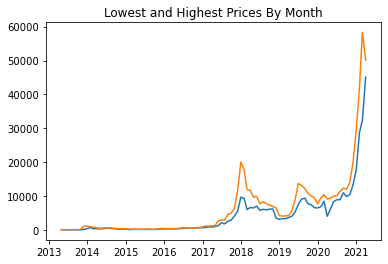

In [23]:
plt.plot(bitcoin_groupbymonth_df[['Low',]].min())
plt.plot(bitcoin_groupbymonth_df[['High']].max())
plt.title('Lowest and Highest Prices By Month')
plt.show()

Text(0.5, 1.0, "Difference between a month's Highest and Lowest price")

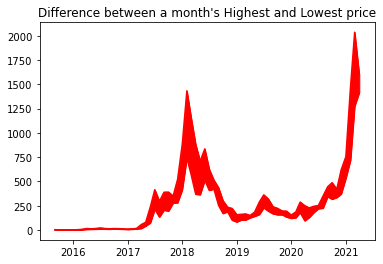

In [34]:
delta = ethereum_groupbymonth_df['High'].max()
delta = pd.DataFrame(delta)
delta['Low'] = ethereum_groupbymonth_df['Low'].min()
delta['Delta'] = delta['High'] - delta['Low']
plt.plot(delta['High'], color = 'red')
plt.plot(delta['Low'], color = 'red')
delta['x1'] = delta.index
plt.fill_between(x=delta['x1'], y1=delta['Low'], y2=delta['High'], color = 'red')
plt.title("Difference between a month's Highest and Lowest price")


In [32]:
delta

,High,Low,Delta,x1
Datestamp,,,,
2013-04-30,4.57,134.00,-129.43,2013-04-30
2013-05-31,4.36,79.10,-74.74,2013-05-31
2013-06-30,3.58,88.50,-84.92,2013-06-30
2013-07-31,3.30,65.53,-62.23,2013-07-31
2013-08-31,3.12,101.21,-98.09,2013-08-31
...,...,...,...,...
2020-11-30,93.58,13243.16,-13149.58,2020-11-30
2020-12-31,138.32,17619.53,-17481.21,2020-12-31
2021-01-31,185.78,28722.76,-28536.98,2021-01-31


In [38]:
#['bitcoin','ethereum','litecoin','iota','monero','dash']
coinlist = ['bitcoin','ethereum','litecoin','iota','monero','dash']

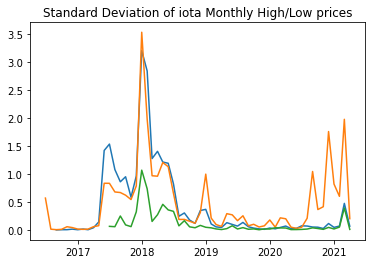

In [16]:
# draft loop
# create [var]coin_df
# group by month
# create plots 

for coin in coinlist:
    # create multiple dataframes for coins, sort by date 
    globals()[f"{coin}_df"] = RawCrypto_df.loc[RawCrypto_df['Coin'] == coin].sort_values(by='Datestamp')
    # create mutliple groupby tables 
    exec(f"{coin}_groupbymonth_df = {coin}_df.groupby(pd.Grouper(key='Datestamp',freq='1M'))")
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].std())")
    exec(f"plt.title('Standard Deviation of {coin} Monthly High/Low prices')")

plt.show()

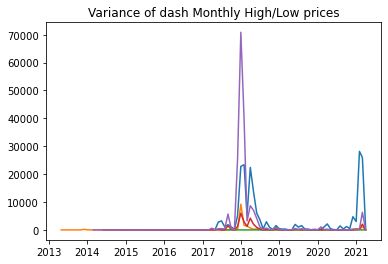

In [22]:
for coin in coinlist:
    exec(f"plt.plot({coin}_groupbymonth_df[['High']].var())")
    exec(f"plt.title('Variance of {coin} Monthly High/Low prices')")  

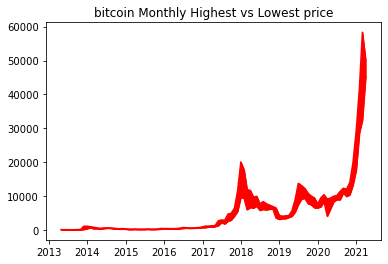

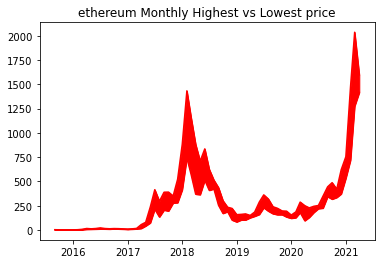

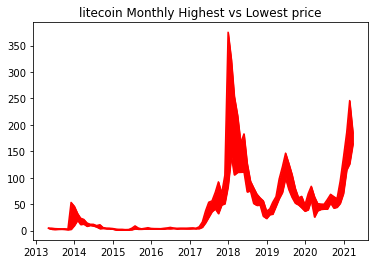

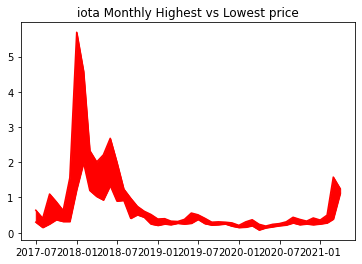

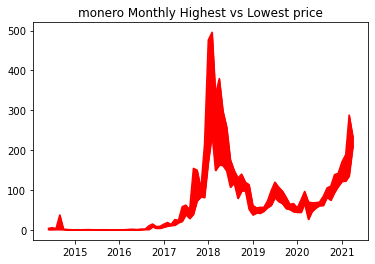

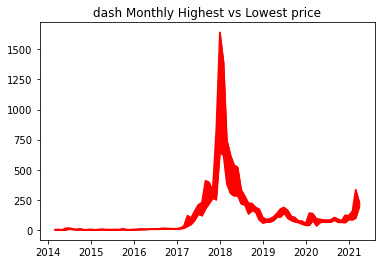

In [39]:
for coin in coinlist:
    exec(f"{coin}_delta = {coin}_groupbymonth_df['High'].max()")
    exec(f"{coin}_delta = pd.DataFrame({coin}_delta)")
    exec(f"{coin}_delta['Low'] = {coin}_groupbymonth_df['Low'].min()")
    exec(f"{coin}_delta['Delta'] = {coin}_delta['High'] - {coin}_delta['Low']")
    plt.figure()
    exec(f"plt.plot({coin}_delta['High'], color = 'red')")
    exec(f"plt.plot({coin}_delta['Low'], color = 'red')")
    exec(f"{coin}_delta['x1'] = {coin}_delta.index")
    exec(f"plt.fill_between(x={coin}_delta['x1'], y1={coin}_delta['Low'], y2={coin}_delta['High'], color = 'red')")
    exec(f"plt.title('{coin} Monthly Highest vs Lowest price')")


,Coin,Date,Open,High,Low,Close,Volume,Market Cap
Datestamp,,,,,,,,
2013-04-30,litecoin,"Apr 30, 2013",4.40,4.57,4.23,4.38,0,"$75,388,964"
2013-05-31,litecoin,"May 31, 2013",4.29,4.36,3.52,3.80,0,"$65,604,596"
2013-06-30,litecoin,"Jun 30, 2013",3.13,3.58,2.90,3.12,0,"$58,663,905"
2013-07-31,litecoin,"Jul 31, 2013",3.15,3.30,3.06,3.15,0,"$61,435,019"
2013-08-31,litecoin,"Aug 31, 2013",3.01,3.12,2.94,3.01,0,"$60,288,258"
...,...,...,...,...,...,...,...,...
2020-11-30,litecoin,"Nov 30, 2020",89.20,93.58,86.83,89.21,8965913476,"$5,882,460,030"
2020-12-31,litecoin,"Dec 31, 2020",130.03,138.32,127.07,130.05,14103307412,"$8,608,138,657"
2021-01-31,litecoin,"Jan 31, 2021",177.48,185.78,164.15,177.48,17994263494,"$9,943,883,702"
